### What is Data Cleaning?
Data cleaning is a crucial step in the machine learning (ML) pipeline, as it involves identifying and removing any missing, duplicate, or irrelevant data. The goal of data cleaning is to ensure that the data is accurate, consistent, and free of errors, as incorrect or inconsistent data can negatively impact the performance of the ML model. Professional data scientists usually invest a very large portion of their time in this step because of the belief that “Better data beats fancier algorithms”. 

Data cleaning, also known as data cleansing or data preprocessing <br>

### Why is Data Cleaning Important?

Data cleansing is a crucial step in the data preparation process, playing an important role in ensuring the **accuracy**, **reliability**, and overall **quality** of a dataset.

- For **decision-making**, the integrity of the conclusions drawn heavily relies on the cleanliness of the underlying data.
- Without proper data cleaning:
  - Inaccuracies, outliers, missing values, and inconsistencies can compromise the validity of analytical results.
- Moreover:
  - Clean data facilitates more effective modeling and pattern recognition.
  - Algorithms perform optimally when fed high-quality, error-free input.


## Missing Value Handleing
    Missing values:  Lack of some data or missing information can result in failure to make the right conclusions and can or else lead to creating a biased result.

### Part-1: Missing value available or not

In [107]:
import pandas as pd

In [108]:
dataset = pd.read_csv('loan.csv')
dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [109]:
dataset.shape

(614, 13)

In [110]:
#find the missing values count in each column
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [111]:
#percentage of missing values in each column
(dataset.isnull().sum()/dataset.shape[0])*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [112]:
#total missing values in the dataset
print(dataset.isnull().sum().sum())
#percentage of total missing values in the dataset
print((dataset.isnull().sum().sum()/(dataset.shape[0]*dataset.shape[1]))*100)

149
1.8667000751691305


In [113]:
#not null values in each column
dataset.isnull().count()

Loan_ID              614
Gender               614
Married              614
Dependents           614
Education            614
Self_Employed        614
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           614
Loan_Amount_Term     614
Credit_History       614
Property_Area        614
Loan_Status          614
dtype: int64

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

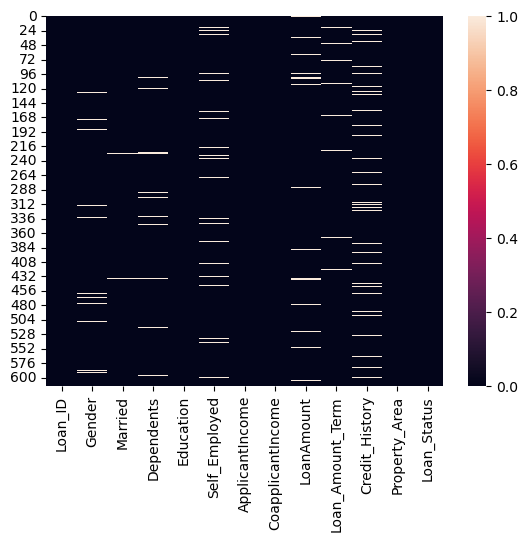

In [115]:
sns.heatmap(dataset.isnull())
plt.show()

### Part-2: Missing value handeling

In [116]:
#delete the missing values
ds = dataset
ds.head(10)
ds.shape

(614, 13)

In [117]:
ds.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [118]:
#delete credit_History column
ds.drop(columns=['Credit_History'], inplace=True)
ds.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,Semiurban,N


In [119]:
#delete rows with missing values
ds.dropna(inplace=True)
ds.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

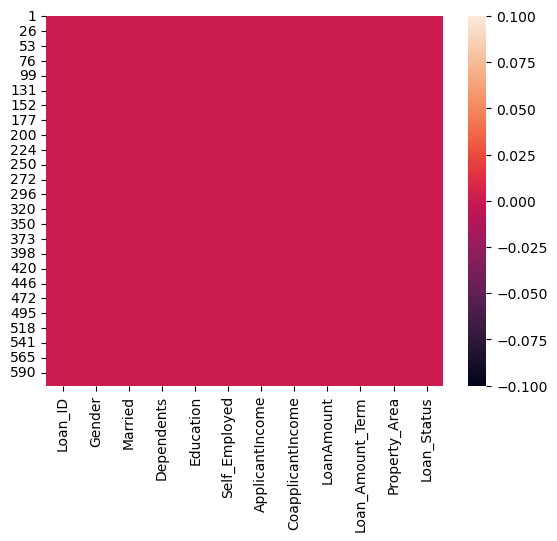

In [120]:
sns.heatmap(ds.isnull())

In [121]:
ds.shape

(523, 12)

In [ ]:
#fill the missing values